In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import pandas as pd
import random
import scipy.linalg
import seaborn as sns
import time
from tqdm.notebook import tqdm
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh
plt.ion()
%matplotlib inline



class Timer(object):
    def __enter__(self):
        self.t0 = time.time()
    def __exit__(self, exc_type, exc_val, exc_tb):
        print('[time spent: {time:.2f}s]'.format(time = time.time() - self.t0))


# path = 'result/remove_features'
# if not os.path.exists(path):
#     os.makedirs(path)


seed = 42
# for system_name in ['Rossler', 'Rabinovich Fabrikant','Lorenz']:
system_name = 'Rabinovich Fabrikant'
# system_name = 'Lorenz'

random.seed(seed) 
np.random.seed(seed)


mses = [[] for _ in range(3)]
dim=1
U0 = np.loadtxt('dataset/matlab_gendata/'+system_name+'.csv', delimiter=',').T[:dim]
U = U0 + np.random.randn(*U0.shape)*1e-3
U = np.atleast_2d(U)
num_prepare = 1000
train_start = num_prepare
num_train = 10000
val_start = num_prepare + num_train
num_val = 1000
test_start = num_prepare + num_train + num_val
num_test = 5000
print('dataset shape:', U.shape)


inSize = U.shape[0]
outSize = inSize  
resSize = 1000
a = 0.9           # leaking rate
K = 0.99          # spectial redius
reg = 1e-6       # regularization coefficient 
input_scaling = 1


# generation of random weights
Win = (np.random.rand(resSize,1+inSize)-0.5) * input_scaling
W = np.random.rand(resSize,resSize)-0.5
largest_eigvals, _ = largest_eigsh(W@W.T, 1, which='LM')
rhoW = np.sqrt(largest_eigvals[0])
W = W/rhoW*(K-1+a)/a 
X = np.zeros((resSize,U.shape[1]))

x = np.zeros([resSize,1])

for t in tqdm(range(U.shape[1])):
    u = U[:,t:t+1]
    x = (1-a) * x + a * np.tanh( Win @ np.vstack((1,u)) + W @ x ) 
    X[:,t:t+1] = x

# offline train
U_train = U[:,train_start : train_start + num_train]
X_train = X[:,train_start : train_start + num_train]
Y_train = U[:,train_start + 1 : train_start + num_train + 1]
H = np.vstack((np.ones((1,X_train.shape[1])),X_train))

Wout = Y_train @ H.T @ np.linalg.inv( H @ H.T + reg*np.eye(H.shape[0]))
print('pre_output shape:', H.shape)
print('W_out shape:', Wout.shape)


dataset shape: (1, 20000)


  0%|          | 0/20000 [00:00<?, ?it/s]

pre_output shape: (1001, 10000)
W_out shape: (1, 1001)


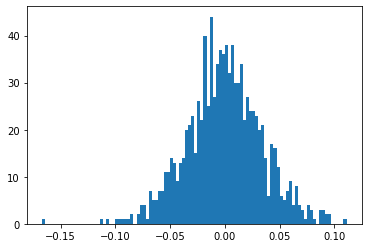

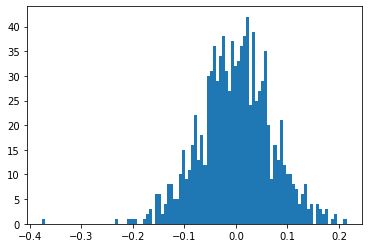

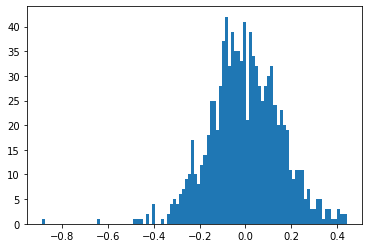

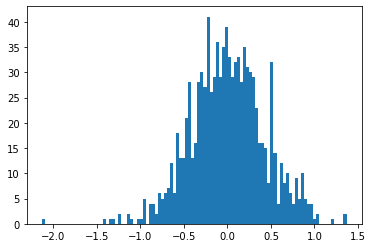

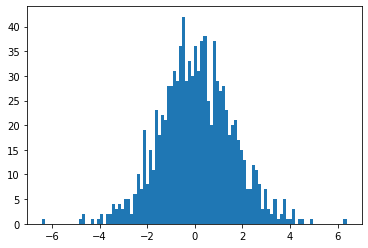

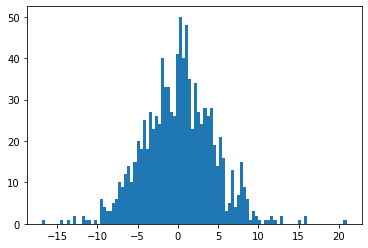

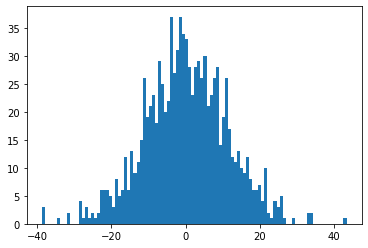

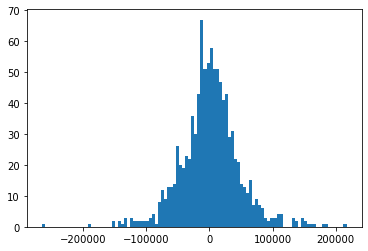

In [20]:
for reg in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8,0]:
    Wout = Y_train @ H.T @ np.linalg.inv( H @ H.T + reg*np.eye(H.shape[0]))
#     _ = plt.plot(Wout.T[:100])
#     plt.yscale('log')
    plt.hist(Wout.T, bins=100)
    plt.show()

AttributeError: 'Patch3D' object has no property 'zs'

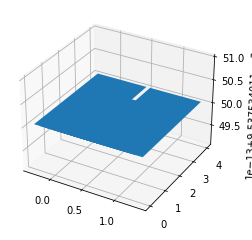

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)
 
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.hist(ys, zs=z, zdir='y',  alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
 
plt.show()